In [1]:
#importing dependencies
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
from pandas import read_csv 
dataset=read_csv('D:/breast_cancer.csv') 
data_frame=pd.DataFrame(dataset)
data_frame
data_frame.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [3]:
#Drop the column with all mising values
data_frame = data_frame.dropna(axis=1)

In [4]:
# Get the new count of the number of rows and columns
data_frame.shape

(569, 32)

In [5]:
#Get a count of the number Malignant (M) Benign (B) cells
data_frame['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
#Look at the datatypes to see which columns need tobe encoded
data_frame.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
data_frame.iloc[:,1] = labelencoder_Y.fit_transform(data_frame.iloc[:,1].values)

data_frame.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: object

In [9]:
#Prnit the first 5 rows of the new data
data_frame.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# Get the correlation of the columns
data_frame.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<Axes: >

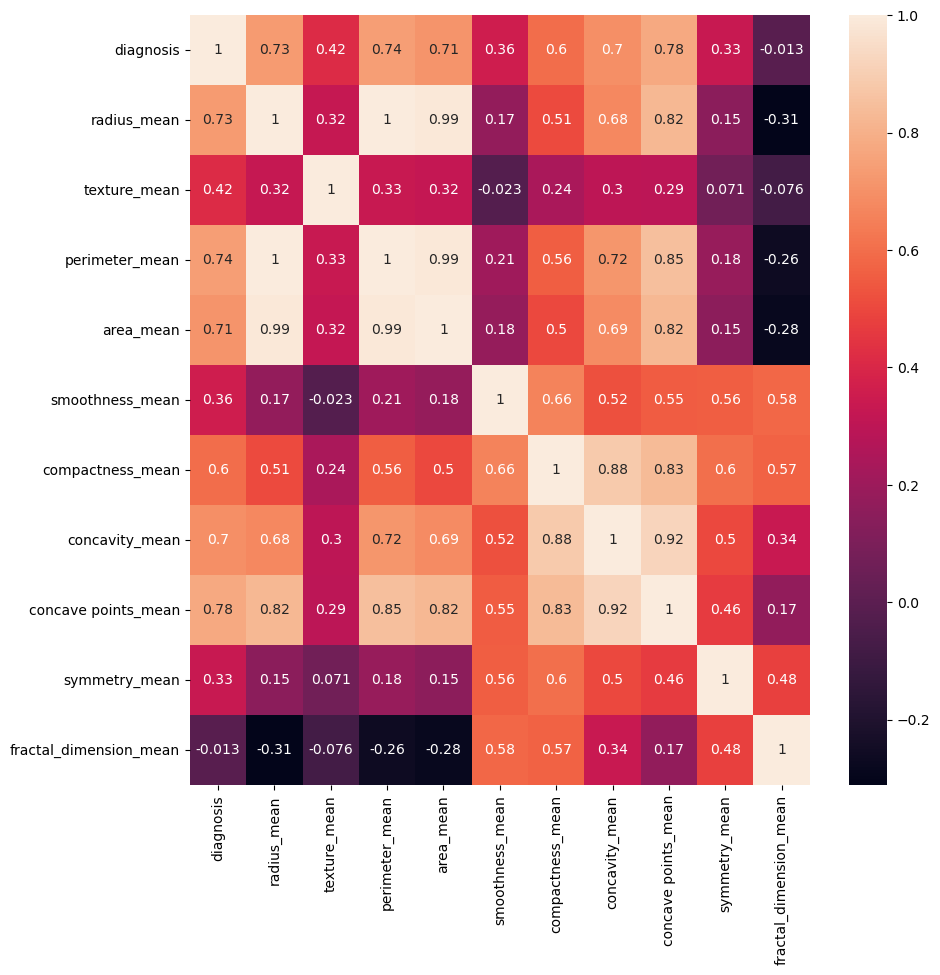

In [11]:
#Visualize the corelation
plt.figure(figsize=(10,10))
sns.heatmap(data_frame.iloc[:,1:12].corr(), annot=True)

In [12]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [13]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [14]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [15]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [17]:
# print last 5 rows of the dataframe
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [18]:
# number of rows and columns in the dataset
data_frame.shape

(569, 31)

In [19]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [20]:
# checking for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [21]:
# statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [22]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

1 --> Benign

0 --> Malignant

In [23]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [24]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [25]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [26]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32


Splitting the data into training data & Testing data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


# MACHINE LEARNING

Model Training

In [29]:
#Create a function for the models
def models(X_train, Y_train):

  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #Decision tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train, Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators =10, criterion = 'entropy', random_state =0)
  forest.fit(X_train, Y_train)

  #Print the models accuracy on the training data
  print('[0] Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1] Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[2] Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

  return log, tree, forest

In [30]:
#Getting all the models
model = models(X_train, Y_train)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0] Logistic Regression Training Accuracy: 0.9516483516483516
[1] Decision Tree Classifier Training Accuracy: 1.0
[2] Random Forest Classifier Training Accuracy: 1.0


In [31]:
#Test model accuracy on the test data on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
  print('Model, i')
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print('Testing Accuracy =', (TP + TN)/ (TP + TN + FN + FP))
  print()

Model, i
[[41  4]
 [ 5 64]]
Testing Accuracy = 0.9210526315789473

Model, i
[[42  3]
 [ 8 61]]
Testing Accuracy = 0.9035087719298246

Model, i
[[43  2]
 [ 6 63]]
Testing Accuracy = 0.9298245614035088



In [32]:
#Show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range( len(model) ):
  print('Model', i)
  print( classification_report(Y_test, model[i].predict(X_test)))
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Model 0
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        45
           1       0.94      0.93      0.93        69

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

0.9210526315789473

Model 1
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        45
           1       0.95      0.88      0.92        69

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114

0.9035087719298246

Model 2
              precision    recall  f1-score   support

           0       0.88      0.96      0.91        45
           1       0.97      0.91      0.94        69

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted a

In [33]:
#Print the prediction of random forest Classifier Model
pred = model[2].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1
 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 0]

528    1
291    1
467    1
108    0
340    1
      ..
471    1
449    0
24     0
38     0
230    0
Name: label, Length: 114, dtype: int32


In [34]:
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model[2].predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[1]
The Breast Cancer is Benign


D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# DEEP LEARNING

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

**Building the Neural Network**

In [37]:
# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [38]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

D:\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
# training the Meural Network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7047 - loss: 0.7440 - val_accuracy: 0.7609 - val_loss: 0.6594
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8504 - loss: 0.4676 - val_accuracy: 0.8043 - val_loss: 0.4743
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8800 - loss: 0.3205 - val_accuracy: 0.8261 - val_loss: 0.3598
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9015 - loss: 0.2475 - val_accuracy: 0.8696 - val_loss: 0.2965
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9165 - loss: 0.2048 - val_accuracy: 0.8913 - val_loss: 0.2577
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9325 - loss: 0.1747 - val_accuracy: 0.9130 - val_loss: 0.2303
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9537 - loss: 0.1523 - val_accuracy: 0.9130 - val_loss: 0.2089
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9653 - loss: 0.1348 - val_accuracy: 0.9130 - val_loss

Visualizing accuracy and loss

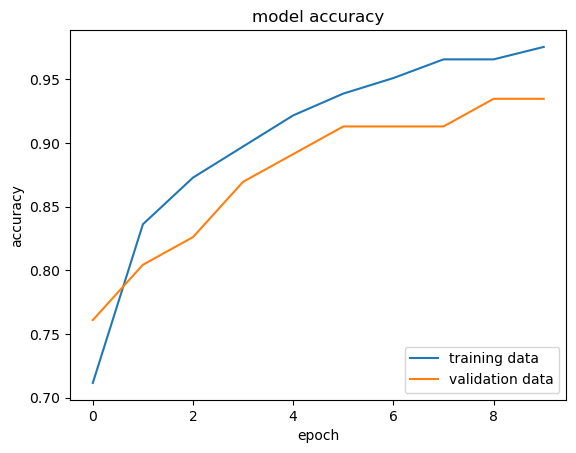

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

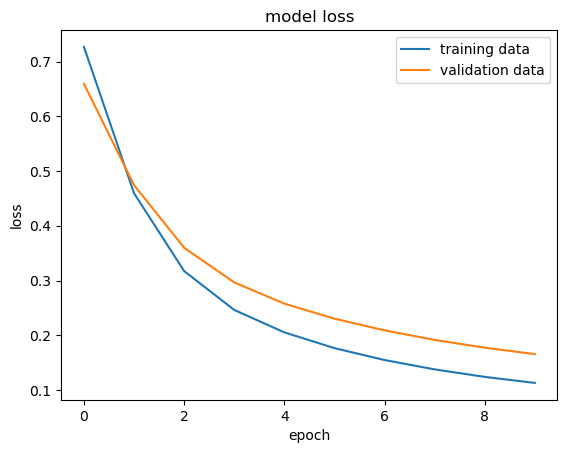

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

Accuracy of the model on test data

In [43]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9240 - loss: 0.2013 
0.9298245906829834


In [44]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [45]:
Y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [46]:
print(Y_pred.shape)
print(Y_pred[0])
#show the probability of 0 and 1

(114, 2)
[0.37303817 0.4580443 ]


In [47]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [48]:
print(Y_pred)
#this won't give us the label instead it give the probability of chances of 0 and 1

[[3.73038173e-01 4.58044291e-01]
 [2.32346162e-01 4.45559114e-01]
 [4.37306501e-02 8.43717992e-01]
 [9.22356129e-01 1.08576196e-05]
 [3.10517728e-01 4.93670166e-01]
 [8.37631702e-01 1.10550015e-03]
 [2.93037266e-01 7.44712412e-01]
 [2.54182331e-02 8.33654642e-01]
 [9.46171507e-02 7.45068789e-01]
 [3.05315834e-02 5.72443008e-01]
 [3.71396452e-01 4.06279564e-01]
 [1.40368462e-01 5.56118011e-01]
 [1.46198004e-01 7.50336349e-01]
 [1.86036661e-01 6.85347080e-01]
 [5.28327487e-02 8.33394229e-01]
 [7.48034596e-01 7.67567893e-03]
 [3.93464528e-02 6.57987356e-01]
 [5.09186238e-02 5.10348916e-01]
 [1.97117385e-02 7.36806631e-01]
 [6.59144998e-01 5.05286176e-03]
 [7.99654126e-01 2.40552112e-01]
 [2.77264714e-02 7.18083978e-01]
 [7.35371634e-02 6.92035556e-01]
 [1.43942852e-02 7.69643545e-01]
 [8.22739676e-02 6.08678699e-01]
 [7.62650371e-01 9.64500941e-03]
 [1.45507470e-01 5.03150582e-01]
 [3.10172856e-01 3.88622075e-01]
 [6.48293734e-01 1.53077710e-02]
 [7.11577117e-01 4.54240805e-03]
 [7.213106

model.predict() gives the prediction probability of each class for that data point

In [49]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

#argmox function which give us the index of maximum value

[0.25, 0.56]
1


In [50]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


**Building the predictive system**

In [51]:
#input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)
input_data=(20.6,29.33,140.1,1265,0.1178,0.277,0.3514,0.152,0.2397,0.07016,0.726,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.74,39.42,184.6,1821,0.165,0.8681,0.9387,0.265,0.4087,0.124)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[7.74545312e-01 1.04670056e-04]]
[0]
The tumor is Malignant


D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [54]:
# import tkinter as tk
# from tkinter import ttk
# import numpy as np

# # Define your model and scaler here
# # model = YourModel()
# # scaler = YourScaler()

# def predict_tumor(input_data):
#     input_data_as_numpy_array = np.asarray(input_data)
#     input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#     input_data_std = scaler.transform(input_data_reshaped)
#     prediction = model.predict(input_data_std)
#     prediction_label = "Malignant" if prediction == 0 else "Benign"
#     return prediction_label

# def predict():
#     input_data = [float(entry.get()) for entry in entries]
#     prediction_label = predict_tumor(input_data)
#     result_label.config(text="Prediction: " + prediction_label)

# # Create the main application window
# root = tk.Tk()
# root.title("Tumor Prediction")

# # Create labels and entry boxes for input data
# labels = ["Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", 
#           "Mean Smoothness", "Mean Compactness", "Mean Concavity", 
#           "Mean Concave Points", "Mean Symmetry", "Mean Fractal Dimension", 
#           "Radius SE", "Texture SE", "Perimeter SE", "Area SE", 
#           "Smoothness SE", "Compactness SE", "Concavity SE", 
#           "Concave Points SE", "Symmetry SE", "Fractal Dimension SE", 
#           "Worst Radius", "Worst Texture", "Worst Perimeter", "Worst Area", 
#           "Worst Smoothness", "Worst Compactness", "Worst Concavity", 
#           "Worst Concave Points", "Worst Symmetry", "Worst Fractal Dimension"]

# entries = []
# for i, label in enumerate(labels):
#     col = 0 if i % 2 == 0 else 2
#     ttk.Label(root, text=label).grid(row=i//2, column=col, padx=5, pady=5, sticky="w")
#     entry = ttk.Entry(root)
#     entry.grid(row=i//2, column=col+1, padx=5, pady=5)
#     entries.append(entry)

# # Create a button to trigger prediction
# predict_button = ttk.Button(root, text="Predict", command=predict)
# predict_button.grid(row=len(labels)//2 + 1, columnspan=2, padx=5, pady=10)

# # Create a label to display the prediction result
# result_label = ttk.Label(root, text="")
# result_label.grid(row=len(labels)//2 + 2, columnspan=2, padx=5, pady=5)

# root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 19, in predict
    prediction_label = predict_tumor(input_data)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 14, in predict_tumor
    prediction_label = "Malignant" if prediction == 0 else "Benign"
                                      ^^^^^^^^^^^^^^^
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 19, in predict
    prediction_label = predict_tumor(input_data)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 14, in predict_tumor
    prediction_label = "Malignant" if prediction == 0 else "Benign"
                                      ^^^^^^^^^^^^^^^
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 19, in predict
    prediction_label = predict_tumor(input_data)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 14, in predict_tumor
    prediction_label = "Malignant" if prediction == 0 else "Benign"
                                      ^^^^^^^^^^^^^^^
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 19, in predict
    prediction_label = predict_tumor(input_data)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 14, in predict_tumor
    prediction_label = "Malignant" if prediction == 0 else "Benign"
                                      ^^^^^^^^^^^^^^^
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 19, in predict
    prediction_label = predict_tumor(input_data)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 14, in predict_tumor
    prediction_label = "Malignant" if prediction == 0 else "Benign"
                                      ^^^^^^^^^^^^^^^
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 19, in predict
    prediction_label = predict_tumor(input_data)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 14, in predict_tumor
    prediction_label = "Malignant" if prediction == 0 else "Benign"
                                      ^^^^^^^^^^^^^^^
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 19, in predict
    prediction_label = predict_tumor(input_data)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 14, in predict_tumor
    prediction_label = "Malignant" if prediction == 0 else "Benign"
                                      ^^^^^^^^^^^^^^^
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 19, in predict
    prediction_label = predict_tumor(input_data)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 14, in predict_tumor
    prediction_label = "Malignant" if prediction == 0 else "Benign"
                                      ^^^^^^^^^^^^^^^
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 19, in predict
    prediction_label = predict_tumor(input_data)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 14, in predict_tumor
    prediction_label = "Malignant" if prediction == 0 else "Benign"
                                      ^^^^^^^^^^^^^^^
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 19, in predict
    prediction_label = predict_tumor(input_data)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 14, in predict_tumor
    prediction_label = "Malignant" if prediction == 0 else "Benign"
                                      ^^^^^^^^^^^^^^^
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 19, in predict
    prediction_label = predict_tumor(input_data)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tsubh\AppData\Local\Temp\ipykernel_16252\4237034794.py", line 14, in predict_tumor
    prediction_label = "Malignant" if prediction == 0 else "Benign"
                                      ^^^^^^^^^^^^^^^
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
